In [ ]:
# import torch
# # torch.cuda.is_available()
# torch.cuda.set_device(0)

In [ ]:
# # !nvidia-smi

# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This section compile multiple csv file from google drive and make a merged csv file.
import pandas as pd
import os

# List of CSV files to merge
# Filter the list to only include files with the '.csv' extension
all_files = os.listdir('/content/drive/MyDrive/August20')
city_list = [file for file in all_files if file.endswith('.csv')]

# Create empty list to store DataFrames
df_list = []

for file in city_list:
    # Construct full path
    path = '/content/drive/MyDrive/August20/' + file

    # Read CSV
    df = pd.read_csv(path)

    # Append to DataFrame list
    df_list.append(df)

# Concatenate all DataFrames in the list
merged_df = pd.concat(df_list, ignore_index=True)
data = merged_df

# Export merged DataFrame
# merged_df.to_csv('/content/drive/MyDrive/ELM/merged_CSV/merged_132K.csv', index=False)
print(merged_df.shape)
print(list(merged_df.columns))

(132297, 111)
['system:index', 'City', 'Class', 'HH', 'HH_asm', 'HH_contrast', 'HH_corr', 'HH_dent', 'HH_diss', 'HH_dvar', 'HH_ent', 'HH_idm', 'HH_imcorr1', 'HH_imcorr2', 'HH_inertia', 'HH_maxcorr', 'HH_prom', 'HH_savg', 'HH_sent', 'HH_shade', 'HH_svar', 'HH_var', 'HV', 'HV_asm', 'HV_contrast', 'HV_corr', 'HV_dent', 'HV_diss', 'HV_dvar', 'HV_ent', 'HV_idm', 'HV_imcorr1', 'HV_imcorr2', 'HV_inertia', 'HV_maxcorr', 'HV_prom', 'HV_savg', 'HV_sent', 'HV_shade', 'HV_svar', 'HV_var', 'NSAI1', 'NSAI2', 'SISAI', 'VH', 'VH_asm', 'VH_contrast', 'VH_corr', 'VH_dent', 'VH_diss', 'VH_dvar', 'VH_ent', 'VH_idm', 'VH_imcorr1', 'VH_imcorr2', 'VH_inertia', 'VH_maxcorr', 'VH_prom', 'VH_savg', 'VH_sent', 'VH_shade', 'VH_svar', 'VH_var', 'VV', 'VV_asm', 'VV_contrast', 'VV_corr', 'VV_dent', 'VV_diss', 'VV_dvar', 'VV_ent', 'VV_idm', 'VV_imcorr1', 'VV_imcorr2', 'VV_inertia', 'VV_maxcorr', 'VV_prom', 'VV_savg', 'VV_sent', 'VV_shade', 'VV_svar', 'VV_var', 'indbiMax', 'indbiMedian', 'mndwiMax', 'mndwiMedian', 'mn

In [ ]:
# plot data columns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV dataset into a pandas DataFrame
# data = pd.read_csv('/content/drive/MyDrive/ELM/merged_CSV/merged_81K.csv')
data = merged_df.drop(columns=['system:index', '.geo'])

# # Print the first 5 rows of the DataFrame
# print(data.head(5).T)

# Create dictionary to map old values to new values
value_map = {0:'snow&ice', 1:'water', 2:'vegetation', 3:'bare', 4:'urban'}

# Map the values and assign back to the 'Class' column
data['Class'] = data['Class'].map(value_map)

# Specify the columns to plot against the 'Class' column
columns_to_plot = [ 'HH', 'HH_asm', 'HH_contrast', 'HH_corr', 'HH_dent', 'HH_diss', 'HH_dvar', 'HH_ent', 'HH_idm', 'HH_imcorr1', 'HH_imcorr2', 'HH_inertia', 'HH_maxcorr', 'HH_prom', 'HH_savg', 'HH_sent', 'HH_shade', 'HH_svar', 'HH_var', 'HV', 'HV_asm', 'HV_contrast', 'HV_corr', 'HV_dent', 'HV_diss', 'HV_dvar', 'HV_ent', 'HV_idm', 'HV_imcorr1', 'HV_imcorr2', 'HV_inertia', 'HV_maxcorr', 'HV_prom', 'HV_savg', 'HV_sent', 'HV_shade', 'HV_svar', 'HV_var', 'NSAI1', 'NSAI2', 'SISAI', 'VH', 'VH_asm', 'VH_contrast', 'VH_corr', 'VH_dent', 'VH_diss', 'VH_dvar', 'VH_ent', 'VH_idm', 'VH_imcorr1', 'VH_imcorr2', 'VH_inertia', 'VH_maxcorr', 'VH_prom', 'VH_savg', 'VH_sent', 'VH_shade', 'VH_svar', 'VH_var', 'VV', 'VV_asm', 'VV_contrast', 'VV_corr', 'VV_dent', 'VV_diss', 'VV_dvar', 'VV_ent', 'VV_idm', 'VV_imcorr1', 'VV_imcorr2', 'VV_inertia', 'VV_maxcorr', 'VV_prom', 'VV_savg', 'VV_sent', 'VV_shade', 'VV_svar', 'VV_var', 'indbiMax', 'indbiMedian', 'mndwiMax', 'mndwiMedian', 'mndwiSD', 'ndbiMedian', 'ndbiMin', 'ndbiSD', 'nduiMedian', 'nduiMin', 'nduiSD', 'ndviMax', 'ndviMedian', 'ndviSD', 's2_aerosols', 's2_blue', 's2_green', 's2_nir', 's2_red', 's2_redEdge1', 's2_redEdge2', 's2_redEdge3', 's2_redEdge4', 's2_swir1', 's2_swir2', 's2_waterVapor', 'swiRedMedian', 'viirs']

# Important SAR Texture files
sar_texture = ['HH', 'HH_corr', 'HH_dent', 'HH_savg', 'HH_imcorr1', 'HH_idm', 'HH_sent', 'HV', 'HV_corr', 'HV_dent', 'HV_savg', 'HV_imcorr1', 'HV_idm', 'HV_sent', 'VH', 'VH_corr', 'VH_dent', 'VH_savg', 'VH_imcorr1', 'VH_idm', 'VH_sent', 'VV', 'VV_corr', 'VV_dent', 'VV_savg', 'VV_imcorr1', 'VV_idm', 'VV_sent']
# print(sar_texture)

selected_bands = ['HH', 'HH_corr', 'HH_dent', 'HH_savg', 'HH_imcorr1', 'HH_idm', 'HH_sent', 'HV', 'HV_corr', 'HV_dent', 'HV_savg', 'HV_imcorr1', 'HV_idm', 'HV_sent', 'VH', 'VH_corr', 'VH_dent', 'VH_savg', 'VH_imcorr1', 'VH_idm', 'VH_sent', 'VV', 'VV_corr', 'VV_dent', 'VV_savg', 'VV_imcorr1', 'VV_idm', 'VV_sent', 'ndviMax', 'ndbiMedian', 'ndbiMin', 'nduiMedian', 'nduiMin', 's2_blue', 'mndwiMax', 'mndwiMedian', 'NSAI1', 'NSAI2', 'SISAI']

columns_to_plot = selected_bands

for i in range(0, len(columns_to_plot), 2):

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

  # Boxplot instead of violinplot
  sns.boxplot(x='Class', y=columns_to_plot[i], data=data, ax=ax1, order=['snow&ice','water','vegetation','bare','urban'])   #change sns._plotname_ for new plot

  j = i + 1
  if j < len(columns_to_plot):
     sns.boxplot(x='Class', y=columns_to_plot[j], data=data, ax=ax2, order=['snow&ice','water','vegetation','bare','urban'])#change sns._plotname_ for new plot

  plt.tight_layout()
  plt.show()

In [ ]:
# SDI calculation and Export

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate SDI between each pair of classes
df = merged_df.drop(columns=['system:index', '.geo', 'City'])

# Create dictionary to map old values to new values
value_map = {0:'snow&ice', 1:'water', 2:'vegetation', 3:'bare', 4:'urban'}

# Map the values and assign back to the 'Class' column
df['Class'] = df['Class'].map(value_map)

# Group the DataFrame by the 'Class' column
grouped = df.groupby('Class')

sdi_values = {}
for col in df.columns[1:]:

  sdi_values[col] = {}

  for i, c1 in enumerate(grouped.groups):
    for c2 in grouped.groups:

      if c1 == c2:
        continue

      class1 = grouped.get_group(c1)[col]
      class2 = grouped.get_group(c2)[col]

      sdi = spectral_difference_index(class1, class2)

      sdi_values[col][(c1, c2)] = sdi

# Create DataFrame and melt
df = pd.DataFrame.from_dict(sdi_values, orient='index')
df = df.reset_index().melt(id_vars='index')
df.columns = ['Feature', 'Class1', 'Class2', 'SDI']

# Disable truncation
pd.options.display.max_rows = None

print(df)
# df.to_csv('/content/drive/MyDrive/ELM/merged_CSV/SDI_Classes.csv', index=False)

In [ ]:
# columns_to_plot = [
#     'HH', 'HH_asm', 'HH_contrast', 'HH_corr', 'HH_dent', 'HH_diss', 'HH_dvar', 'HH_ent', 'HH_idm', 'HH_imcorr1',
#     'HH_imcorr2', 'HH_inertia', 'HH_maxcorr', 'HH_prom', 'HH_savg', 'HH_sent', 'HH_shade', 'HH_svar', 'HH_var',
#     'HV', 'HV_asm', 'HV_contrast', 'HV_corr', 'HV_dent', 'HV_diss', 'HV_dvar', 'HV_ent', 'HV_idm', 'HV_imcorr1',
#     'HV_imcorr2', 'HV_inertia', 'HV_maxcorr', 'HV_prom', 'HV_savg', 'HV_sent', 'HV_shade', 'HV_svar', 'HV_var',
#     'NSAI1', 'NSAI2', 'SISAI', 'VH', 'VH_asm', 'VH_contrast', 'VH_corr', 'VH_dent', 'VH_diss', 'VH_dvar', 'VH_ent',
#     'VH_idm', 'VH_imcorr1', 'VH_imcorr2', 'VH_inertia', 'VH_maxcorr', 'VH_prom', 'VH_savg', 'VH_sent', 'VH_shade',
#     'VH_svar', 'VH_var', 'VV', 'VV_asm', 'VV_contrast', 'VV_corr', 'VV_dent', 'VV_diss', 'VV_dvar', 'VV_ent',
#     'VV_idm', 'VV_imcorr1', 'VV_imcorr2', 'VV_inertia', 'VV_maxcorr', 'VV_prom', 'VV_savg', 'VV_sent', 'VV_shade',
#     'VV_svar', 'VV_var', 'indbiMax', 'indbiMedian', 'mndwiMax', 'mndwiMedian', 'mndwiSD', 'ndbiMedian', 'ndbiMin',
#     'ndbiSD', 'nduiMedian', 'nduiMin', 'nduiSD', 'ndviMax', 'ndviMedian', 'ndviSD', 's2_aerosols', 's2_blue',
#     's2_green', 's2_nir', 's2_red', 's2_redEdge1', 's2_redEdge2', 's2_redEdge3', 's2_redEdge4', 's2_swir1',
#     's2_swir2', 's2_waterVapor', 'swiRedMedian', 'viirs'
# ]

# new_list = [band for band in columns_to_plot if band.endswith(('corr','sent', 'dent', 'savg', 'imcorr1', 'idm'))]

# print(new_list)

['HH_corr', 'HH_dent', 'HH_idm', 'HH_imcorr1', 'HH_maxcorr', 'HH_savg', 'HH_sent', 'HV_corr', 'HV_dent', 'HV_idm', 'HV_imcorr1', 'HV_maxcorr', 'HV_savg', 'HV_sent', 'VH_corr', 'VH_dent', 'VH_idm', 'VH_imcorr1', 'VH_maxcorr', 'VH_savg', 'VH_sent', 'VV_corr', 'VV_dent', 'VV_idm', 'VV_imcorr1', 'VV_maxcorr', 'VV_savg', 'VV_sent']


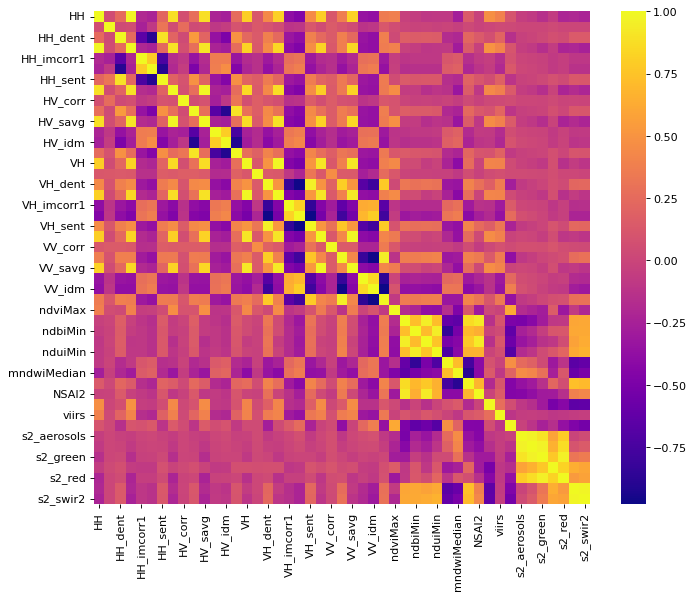

training dataset shape (132297, 109)
X.columns.tolist() ['City', 'Class', 'HH', 'HH_asm', 'HH_contrast', 'HH_corr', 'HH_dent', 'HH_diss', 'HH_dvar', 'HH_ent', 'HH_idm', 'HH_imcorr1', 'HH_imcorr2', 'HH_inertia', 'HH_maxcorr', 'HH_prom', 'HH_savg', 'HH_sent', 'HH_shade', 'HH_svar', 'HH_var', 'HV', 'HV_asm', 'HV_contrast', 'HV_corr', 'HV_dent', 'HV_diss', 'HV_dvar', 'HV_ent', 'HV_idm', 'HV_imcorr1', 'HV_imcorr2', 'HV_inertia', 'HV_maxcorr', 'HV_prom', 'HV_savg', 'HV_sent', 'HV_shade', 'HV_svar', 'HV_var', 'NSAI1', 'NSAI2', 'SISAI', 'VH', 'VH_asm', 'VH_contrast', 'VH_corr', 'VH_dent', 'VH_diss', 'VH_dvar', 'VH_ent', 'VH_idm', 'VH_imcorr1', 'VH_imcorr2', 'VH_inertia', 'VH_maxcorr', 'VH_prom', 'VH_savg', 'VH_sent', 'VH_shade', 'VH_svar', 'VH_var', 'VV', 'VV_asm', 'VV_contrast', 'VV_corr', 'VV_dent', 'VV_diss', 'VV_dvar', 'VV_ent', 'VV_idm', 'VV_imcorr1', 'VV_imcorr2', 'VV_inertia', 'VV_maxcorr', 'VV_prom', 'VV_savg', 'VV_sent', 'VV_shade', 'VV_svar', 'VV_var', 'indbiMax', 'indbiMedian', 'mnd

In [ ]:
# calculate max correlations
import pandas as pd
# data = pd.read_csv('/content/merged_b35.1.csv')
data = merged_df

X_for_plot = data.drop(['system:index', '.geo',
                        # 'Class',"City"
                        # 'indbiMax', 'indbiMedian', 'mndwiMax', 'mndwiMedian', 'mndwiSD', 'ndbiMedian', 'ndbiMin', 'ndbiSD', 'nduiMedian', 'nduiMin', 'nduiSD', 'ndviMax', 'ndviMedian', 'ndviSD', 'swiRedMedian',
                        # 's2_aerosols', 's2_blue', 's2_green', 's2_nir', 's2_red', 's2_redEdge1', 's2_redEdge2', 's2_redEdge3', 's2_redEdge4', 's2_swir1', 's2_swir2', 's2_waterVapor'
                        ], axis=1) # , 'Class'

# Model band lists
# Model 1 has 27 bands
model1_band_list = [
    'ndviMax', 'viirs', 's2_nir', 'mndwiMedian', 'ndviSD', 's2_swir1', 's2_swir2', 'HV_savg', 'VV_savg', 's2_red',
    'SISAI', 'VH_savg', 'VV', 'HH_savg', 'VH', 'nduiMin', 's2_aerosols', 'nduiMedian', 'HV', 's2_blue', 'ndbiMedian',
    'NSAI2', 'HH', 'ndbiMin', 's2_green', 'NSAI1', 'mndwiMax']

# Model 2 has 35 bands
model2_band_list =  [
    'ndviMax', 'viirs', 's2_nir', 'ndviSD', 's2_swir2', 's2_swir1', 'mndwiMedian', 'VV_savg', 'VH', 'HH_savg', 'HV_savg',
    'VH_savg', 'nduiMin', 'SISAI', 's2_aerosols', 's2_red', 'HV', 'VV_dent', 'NSAI1', 'nduiMedian', 'VV', 'VV_idm',
    's2_green', 'ndbiMin', 's2_blue', 'NSAI2', 'ndbiMedian', 'HH', 'mndwiMax', 'VH_dent', 'VH_idm', 'HH_dent', 'HH_idm',
    'HV_dent', 'HV_idm']

# Model 3 has 47 bands
model3_band_list =  ['ndviMax', 'viirs', 'ndviSD', 'mndwiMedian', 's2_swir2', 's2_nir', 's2_swir1', 'VV_savg', 'HV_savg', 'SISAI', 'VH_savg',
 'VV', 'nduiMin', 'VH', 'HH_savg', 'NSAI1', 's2_aerosols', 's2_red', 'nduiMedian', 'HV', 's2_green', 'ndbiMedian',
 'VV_dent', 'ndbiMin', 'HH', 's2_blue', 'NSAI2', 'mndwiMax', 'VV_idm', 'VV_sent', 'VH_dent', 'VV_imcorr1', 'VH_idm',
 'VH_sent', 'VH_imcorr1', 'HH_dent', 'VH_corr', 'VV_corr', 'HH_idm', 'HV_dent', 'HV_idm', 'HH_corr', 'HH_sent', 'HV_sent',
 'HH_imcorr1', 'HV_imcorr1', 'HV_corr']

selected_bands = data[model1_band_list]


df = pd.DataFrame(selected_bands)
corr_matrix = df.corr()
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8), dpi=80)
sn.heatmap(corr_matrix,
          #  vmin=0, vmax=1,
           annot=False, cmap='plasma')
plt.show()

print('training dataset shape', X_for_plot.shape)
print('X.columns.tolist()', X_for_plot.columns.tolist())

In [ ]:
import pandas as pd
import seaborn as sns

# Read CSV and select column
# df = pd.read_csv('/content/merged_b35.1.csv')
df = merged_df
column = df['Class']

# Generate descriptive stats plot
sns.distplot(column)

# Show the plot
plt.show()

In [ ]:
# THIS CODE FOR MEASURING BAND IMPORTANCE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

  # Load data
# data = pd.read_csv('/content/drive/MyDrive/ELM/dhaka.csv')
# df = merged_df
data = merged_df [[
                      'HH', 'HH_savg',
                      'HV', 'HV_savg',
                      'VH', 'VH_savg',
                      'VV', 'VV_savg',
                      'ndviMax', 'ndbiMedian', 'ndbiMin', 'nduiMedian', 'nduiMin',  'mndwiMax', 'mndwiMedian', 'NSAI1', 'NSAI2', 'SISAI',
                      'viirs','ndviSD', 's2_aerosols', 's2_blue', 's2_green', 's2_nir', 's2_red', 's2_swir1', 's2_swir2',
                      'system:index', '.geo','Class', 'City'
                       ]].dropna()

# Split the data into features (X) and labels (y)
# X = data.drop('Class', axis=1)
X = data.drop(['system:index', '.geo','Class', 'City'], axis=1) # , 'Class'
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Try different values of n_estimators and compute accuracy for each value
# n_estimators_list = range(1, 201)
# print(data.shape)
# print(X.shape)

# Train model
rf = RandomForestClassifier(n_estimators=131, random_state=42).fit(X, y)

# Predict the labels of the testing set using the random forest model
y_pred_rf = rf.predict(X_test)

# Evaluate the accuracy of the random forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random forest accuracy:', accuracy_rf)

# Print feature importances
importances = rf.feature_importances_
feature_names = X.columns
for feature_name, importance in zip(feature_names, importances):
    print(feature_name, importance)

Random forest accuracy: 1.0
HH 0.01346550504228416
HH_savg 0.02666947752537387
HV 0.01939937411301164
HV_savg 0.04393308275638554
VH 0.02612245087292532
VH_savg 0.02932152962935882
VV 0.027362910918288543
VV_savg 0.03850437913518809
ndviMax 0.14852593945628678
ndbiMedian 0.013836874686386278
ndbiMin 0.013111671664204905
nduiMedian 0.020595177797008927
nduiMin 0.025872489882240862
mndwiMax 0.009604677222380523
mndwiMedian 0.06885473933909154
NSAI1 0.011809776792462673
NSAI2 0.013718256922933365
SISAI 0.03316843182168816
viirs 0.08772988112136766
ndviSD 0.06731006750019779
s2_aerosols 0.023609732959497566
s2_blue 0.017273108182885584
s2_green 0.01283419613595396
s2_nir 0.0736189708740197
s2_red 0.03395913934424618
s2_swir1 0.05270833205439263
s2_swir2 0.04707982624993899


In [ ]:
# Defining Dataset

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier

# # Load data
data = pd.read_csv('/content/drive/MyDrive/ELM/merged_CSV/merged_132K.csv')
# df = data
# # df = merged_df

# print('data before dropping null values', df.shape)
# # Drop any rows that contain NaN values
# df = df.dropna()
# print('data after dropping null values', df.shape)

# X = data[['HH', 'HH_savg', 'HV', 'HV_savg', 'VH', 'VH_savg', 'VV', 'VV_savg', 'mndwiMedian', 'ndbiMedian', 'nduiMedian',
#           'ndviMax', 'ndviSD', 's2_aerosols', 's2_blue', 's2_green', 's2_nir', 's2_red', 'viirs']]
# y = data['Class']

# Model band lists
model1_band_list = [
    'ndviMax', 'viirs', 's2_nir', 'mndwiMedian', 'ndviSD', 's2_swir1', 's2_swir2', 'HV_savg', 'VV_savg', 's2_red',
    'SISAI', 'VH_savg', 'VV', 'HH_savg', 'VH', 'nduiMin', 's2_aerosols', 'nduiMedian', 'HV', 's2_blue', 'ndbiMedian',
    'NSAI2', 'HH', 'ndbiMin', 's2_green', 'NSAI1', 'mndwiMax', 'Class']
model2_band_list =  [
    'ndviMax', 'viirs', 's2_nir', 'ndviSD', 's2_swir2', 's2_swir1', 'mndwiMedian', 'VV_savg', 'VH', 'HH_savg', 'HV_savg',
    'VH_savg', 'nduiMin', 'SISAI', 's2_aerosols', 's2_red', 'HV', 'VV_dent', 'NSAI1', 'nduiMedian', 'VV', 'VV_idm',
    's2_green', 'ndbiMin', 's2_blue', 'NSAI2', 'ndbiMedian', 'HH', 'mndwiMax', 'VH_dent', 'VH_idm', 'HH_dent', 'HH_idm',
    'HV_dent', 'HV_idm', 'Class']
model3_band_list =  ['ndviMax', 'viirs', 'ndviSD', 'mndwiMedian', 's2_swir2', 's2_nir', 's2_swir1', 'VV_savg', 'HV_savg', 'SISAI', 'VH_savg',
 'VV', 'nduiMin', 'VH', 'HH_savg', 'NSAI1', 's2_aerosols', 's2_red', 'nduiMedian', 'HV', 's2_green', 'ndbiMedian',
 'VV_dent', 'ndbiMin', 'HH', 's2_blue', 'NSAI2', 'mndwiMax', 'VV_idm', 'VV_sent', 'VH_dent', 'VV_imcorr1', 'VH_idm',
 'VH_sent', 'VH_imcorr1', 'HH_dent', 'VH_corr', 'VV_corr', 'HH_idm', 'HV_dent', 'HV_idm', 'HH_corr', 'HH_sent', 'HV_sent',
 'HH_imcorr1', 'HV_imcorr1', 'HV_corr', 'Class']

data = data [model1_band_list].dropna()

# Split the data into features (X) and labels (y)
# X = data.drop('Class', axis=1)
X = data.drop(['Class'], axis=1) # , 'Class'
y = data['Class']
print('dataset shape :', X.shape)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('data and libraries import is completed')
print('training dataset shape', X.shape)
print('X.columns.tolist()',X.columns.tolist())
# print('testing dataset shape', df.shape)
# print('df.columns.tolist()',df.columns.tolist())

dataset shape : (127929, 27)
data and libraries import is completed
training dataset shape (127929, 27)
X.columns.tolist() ['ndviMax', 'viirs', 's2_nir', 'mndwiMedian', 'ndviSD', 's2_swir1', 's2_swir2', 'HV_savg', 'VV_savg', 's2_red', 'SISAI', 'VH_savg', 'VV', 'HH_savg', 'VH', 'nduiMin', 's2_aerosols', 'nduiMedian', 'HV', 's2_blue', 'ndbiMedian', 'NSAI2', 'HH', 'ndbiMin', 's2_green', 'NSAI1', 'mndwiMax']


In [ ]:
# Ensemble model 1 training
# import tensorflow as tf
import joblib
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

# with tf.device('/GPU:0'):
# Final RF model
rf_final = RandomForestClassifier(n_estimators=500, random_state=0)
rf_final.fit(X_train, y_train)
rf_pred = rf_final.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
# Save the trained model to disk
joblib.dump(rf_final, '/content/drive/MyDrive/ELM/TrainedModel/rf_final1_soft_128k_230822.pkl')

# final AB model
ab_final = AdaBoostClassifier(n_estimators=500, random_state=0)
ab_final.fit(X_train, y_train)
ab_pred = ab_final.predict(X_test)
ab_accuracy = accuracy_score(y_test, ab_pred)
# Save the trained model to disk
joblib.dump(ab_final, '/content/drive/MyDrive/ELM/TrainedModel/ab_final1_soft_128k_230822.pkl')

# final GB model
gb_final = GradientBoostingClassifier(n_estimators=500, random_state=0)
gb_final.fit(X_train, y_train)
gb_pred = gb_final.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
# Save the trained model to disk
joblib.dump(gb_final, '/content/drive/MyDrive/ELM/TrainedModel/gb_final1_soft_128k_230822.pkl')

# Final XGB model
xgb_final = xgb.XGBClassifier(n_estimators=1000, random_state=0)
xgb_final.fit(X_train, y_train)
xgb_pred = xgb_final.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
# Save the trained model to disk
joblib.dump(xgb_final, '/content/drive/MyDrive/ELM/TrainedModel/xgb_final1_soft_128k_230822.pkl')

# Create a VotingClassifier with all the individual classifiers
ensemble_model = VotingClassifier(
    estimators=[
        ('Random Forest', rf_final),
        ('AdaBoost', ab_final),
        ('Gradient Boosting', gb_final),
        ('XGBoost', xgb_final)
                ],
                voting='soft'
)
ensemble_model.fit(X_train, y_train)

# Evaluate the models
rf_pred = rf_final.predict(X_test)
ada_pred = ab_final.predict(X_test)
gb_pred = gb_final.predict(X_test)
xgb_pred = xgb_final.predict(X_test)
ensemble_pred = ensemble_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
ada_accuracy = accuracy_score(y_test, ada_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)

# print model accuracies
print('rf_accuracy :', rf_accuracy)
print('ada_accuracy :', ada_accuracy)
print('gb_accuracy :', gb_accuracy)
print('xgb_accuracy :', xgb_accuracy)
print('ensemble_accuracy :', ensemble_accuracy)



# Save the trained model to disk
joblib.dump(ensemble_model, '/content/drive/MyDrive/ELM/TrainedModel/ensemble_model1u.1_soft_128k_230821.pkl')

rf_accuracy : 0.9683420620651919
ada_accuracy : 0.5832095677323537
gb_accuracy : 0.9708434300007817
xgb_accuracy : 0.9758461658719613
ensemble_accuracy : 0.975103572266083


['/content/drive/MyDrive/ELM/TrainedModel/ensemble_model1u.1_soft_128k_230821.pkl']

In [ ]:
# !pip install rasterio
import joblib
ensemble_model = joblib.load('/content/drive/MyDrive/ELM/TrainedModel/ensemble_model1u_soft_128k_230821.pkl')

# Model band lists
model1_band_list = [
    'ndviMax', 'viirs', 's2_nir', 'mndwiMedian', 'ndviSD', 's2_swir1', 's2_swir2', 'HV_savg', 'VV_savg', 's2_red',
    'SISAI', 'VH_savg', 'VV', 'HH_savg', 'VH', 'nduiMin', 's2_aerosols', 'nduiMedian', 'HV', 's2_blue', 'ndbiMedian',
    'NSAI2', 'HH', 'ndbiMin', 's2_green', 'NSAI1', 'mndwiMax']
model2_band_list =  [
    'ndviMax', 'viirs', 's2_nir', 'ndviSD', 's2_swir2', 's2_swir1', 'mndwiMedian', 'VV_savg', 'VH', 'HH_savg', 'HV_savg',
    'VH_savg', 'nduiMin', 'SISAI', 's2_aerosols', 's2_red', 'HV', 'VV_dent', 'NSAI1', 'nduiMedian', 'VV', 'VV_idm',
    's2_green', 'ndbiMin', 's2_blue', 'NSAI2', 'ndbiMedian', 'HH', 'mndwiMax', 'VH_dent', 'VH_idm', 'HH_dent', 'HH_idm',
    'HV_dent', 'HV_idm']
model3_band_list =  [
    'ndviMax', 'viirs', 'ndviSD', 'mndwiMedian', 's2_swir2', 's2_nir', 's2_swir1', 'VV_savg', 'HV_savg', 'SISAI', 'VH_savg',
    'VV', 'nduiMin', 'VH', 'HH_savg', 'NSAI1', 's2_aerosols', 's2_red', 'nduiMedian', 'HV', 's2_green', 'ndbiMedian',
    'VV_dent', 'ndbiMin', 'HH', 's2_blue', 'NSAI2', 'mndwiMax', 'VV_idm', 'VV_sent', 'VH_dent', 'VV_imcorr1', 'VH_idm',
    'VH_sent', 'VH_imcorr1', 'HH_dent', 'VH_corr', 'VV_corr', 'HH_idm', 'HV_dent', 'HV_idm', 'HH_corr', 'HH_sent', 'HV_sent',
    'HH_imcorr1', 'HV_imcorr1', 'HV_corr']

import pandas as pd
import numpy as np
import os
import rasterio
import matplotlib.pyplot as plt

directories = ['/content/drive/MyDrive/August22Model1',
               '/content/drive/MyDrive/ELM/ClassifiedCity30/model_1']

# Initialize empty sets for collecting files
todo_files_set = set()
done_files_set = set()

# Iterate over directories
for directory in directories:
    files = os.listdir(directory)

    # Filter the list to only include files with the '.tif' extension
    tif_files = [file for file in files if file.endswith('.tif')]

    # Update the respective sets
    if directory == directories[0]:
        todo_files_set.update(tif_files)
    elif directory == directories[1]:
        done_files_set.update(tif_files)

# Find the difference between todo_files_set and done_files_set
todo_city_list = list(todo_files_set - done_files_set)
print('todo_city_list:', todo_city_list)
print('done_city_list:', list(done_files_set))

for file in todo_city_list:
    # Construct full path
    path = '/content/drive/MyDrive/August22Model1/' + file
    print(path)

    # Read the image
    with rasterio.open(path) as src:
        image = src.read()
        meta = src.meta

    # Reshape the image to 2D array using pandas
    print('Image shape before reshaping', image.shape)

    # Reshape to 2D array
    n_samples = image.shape[1] * image.shape[2]
    n_features = image.shape[0]
    image_2d = image.reshape(n_features, n_samples).T

    print('image shape after reshaping', image_2d.shape)

    # Convert to DataFrame
    df = pd.DataFrame(image_2d)
    print('shape of df', df.shape)

    # Renaming the columns
    df.columns = model1_band_list   # fully functional with hard coding the band names as a list

    # Replacing all the NaN value to zero
    df = df.replace(np.nan, 0)

    model = ensemble_model # Used model

    # Predict the classes of the Landsat image
    prediction = model.predict(df)
    print('length of prediction', len(prediction))

    # Reshape the prediction back to 2D
    prediction_2d = prediction.reshape(image.shape[1], image.shape[2])

    # Plot the predicted classes
    plt.imshow(prediction_2d, cmap='plasma')
    plt.colorbar()
    plt.show()

    # Print the city lists after each plt.show()
    # Iterate over directories
    for directory in directories:
        files = os.listdir(directory)

        # Filter the list to only include files with the '.tif' extension
        tif_files = [file for file in files if file.endswith('.tif')]

        # Update the respective sets
        if directory == directories[0]:
            todo_files_set.update(tif_files)
        elif directory == directories[1]:
            done_files_set.update(tif_files)

    # Find the difference between todo_files_set and done_files_set
    todo_city_list = list(todo_files_set - done_files_set)
    print('todo_city_list:', todo_city_list)
    print('done_city_list:', list(done_files_set))

    # This part will save the image
    # Update the metadata to reflect the single band of the predicted classes
    meta.update(count=1, dtype=rasterio.uint8)

    # Create a new raster file with the same metadata
    dst = rasterio.open('/content/drive/MyDrive/ELM/ClassifiedCity30/model_1/' + file, 'w', **meta)

    # Write the predicted classes to the new raster file
    dst.write(prediction_2d.astype(rasterio.uint8), 1)

    # Close the input and output raster files
    src.close()
    dst.close()

todo_city_list: []
done_city_list: ['karachi.tif', 'dubai.tif', 'x_chicago.tif', 'shanghai.tif', 'dhaka.tif', 'cairo.tif', 'harbin.tif', 'london.tif', 'khartoum.tif']


In [ ]:
import joblib
ensemble_model = joblib.load('/content/drive/MyDrive/ELM/ensemble_soft_112k_230815.pkl')

In [ ]:
!pip install rasterio
# attempt to incorporate pandas into the code
import rasterio
import numpy as np

# Load the Landsat image
# with rasterio.open('/content/drive/MyDrive/ELM/chicago.tif') as src:
with rasterio.open('/content/drive/MyDrive/ELM10/dhaka-0000000000-0000000000.tif') as src:
    image = src.read()
    meta = src.meta

# Reshape the image to 2D array using pandas
print('Image shape before reshaping', image.shape)

# Reshape to 2D array
n_samples = image.shape[1] * image.shape[2]
n_features = image.shape[0]
image_2d = image.reshape(n_features,n_samples ).T

print('image shape after reshaping',image_2d.shape)

# Convert to DataFrame
import pandas as pd
df = pd.DataFrame(image_2d)
print('shape of df', df.shape)

# Renaming the columns
df.columns = X.columns.tolist()   # fully functional with hard coding the band names as a list

# Replacing all the NaN value to zero
df = df.replace(np.nan, 0)


model = ensemble_model # Used model

# Predict the classes of the Landsat image
prediction = model.predict(df)
print('length of prediction', len(prediction))

# Reshape the prediction back to 2D
prediction_2d = prediction.reshape(image.shape[1], image.shape[2])

import matplotlib.pyplot as plt

# Plot the predicted classes
plt.imshow(prediction_2d, cmap='plasma')
plt.colorbar()
plt.show()

# This part will save the image
# Update the metadata to reflect the single band of the predicted classes
meta.update(count=1, dtype=rasterio.uint8)

# Create a new raster file with the same metadata
dst = rasterio.open('/content/drive/MyDrive/ELM10/dhaka-1.tif', 'w', **meta)

# Write the predicted classes to the new raster file
dst.write(prediction_2d.astype(rasterio.uint8), 1)

# Close the input and output raster files
src.close()
dst.close()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 63.5 MB/s eta 0:00:00
Image shape before reshaping (19, 6106, 7680)
image shape after reshaping (46894080, 19)
shape of df (46894080, 19)


In [ ]:
# This part will save the image
# Update the metadata to reflect the single band of the predicted classes
meta.update(count=1, dtype=rasterio.uint8)

# Create a new raster file with the same metadata
dst = rasterio.open('/content/drive/MyDrive/ELM/chicago_classified.tif', 'w', **meta)

# Write the predicted classes to the new raster file
dst.write(prediction_2d.astype(rasterio.uint8), 1)

# Close the input and output raster files
src.close()
dst.close()

In [ ]:
# CPU EDITION
# n_estimators range
n_estimators_list = range(1, 101)

# Initialize the maximum accuracy to 0
max_accuracy = 0
best_n_estimators_rf = 0

for n_estimators in n_estimators_list:
   rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
   rf_model.fit(X_train, y_train)
   y_pred_rf = rf_model.predict(X_test)
   accuracy_rf = accuracy_score(y_test, y_pred_rf)
   if accuracy_rf > max_accuracy:
       max_accuracy = accuracy_rf
       best_n_estimators_rf = n_estimators
print('best_n_estimators_rf = ',best_n_estimators_rf, 'accuracy: ',max_accuracy)

# Initialize the maximum accuracy to 0
max_accuracy = 0
best_n_estimators_ab = 0

for n_estimators in n_estimators_list:
   ab_model = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
   ab_model.fit(X_train, y_train)
   y_pred_ab = ab_model.predict(X_test)
   accuracy_ab = accuracy_score(y_test, y_pred_ab)
   if accuracy_ab > max_accuracy:
       max_accuracy = accuracy_ab
       best_n_estimators_ab = n_estimators
print('best_n_estimators_ab = ',best_n_estimators_ab, 'accuracy: ',max_accuracy)

# Initialize the maximum accuracy to 0
max_accuracy = 0
best_n_estimators_gb = 0

for n_estimators in n_estimators_list:
   gb_model = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
   gb_model.fit(X_train, y_train)
   y_pred_gb = gb_model.predict(X_test)
   accuracy_gb = accuracy_score(y_test, y_pred_gb)
   if accuracy_gb > max_accuracy:
       max_accuracy = accuracy_gb
       best_n_estimators_gb = n_estimators
print('best_n_estimators_gb = ',best_n_estimators_gb, 'accuracy: ',max_accuracy)

# Initialize the maximum accuracy to 0
max_accuracy = 0
best_n_estimators_xgb = 0

for n_estimators in n_estimators_list:
   xgb_model = XGBClassifier(n_estimators=n_estimators, random_state=42)
   xgb_model.fit(X_train, y_train)
   y_pred_xgb = xgb_model.predict(X_test)
   accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
   if accuracy_xgb > max_accuracy:
       max_accuracy = accuracy_xgb
       best_n_estimators_xgb = n_estimators
print('best_n_estimators_xgb = ',best_n_estimators_xgb, 'accuracy: ',max_accuracy)

# Define base models
rf = RandomForestClassifier(n_estimators=best_n_estimators_rf, random_state=42)
ada = AdaBoostClassifier(n_estimators=best_n_estimators_ab, random_state=42)
gb = GradientBoostingClassifier(n_estimators=best_n_estimators_gb, random_state=42)
xgb = XGBClassifier(n_estimators=best_n_estimators_xgb, random_state=42)


# Train and evaluate base models
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)

gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Ensemble model
ensemble = VotingClassifier(estimators=[('rf', rf),
 ('ada', ada),
  ('gb', gb),
   ('xgb', xgb)],
                           voting='soft')
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred)

# Print accuracies
print("Random Forest accuracy:", rf_accuracy)
print("AdaBoost accuracy:", ada_accuracy)
print("Gradient Boosting accuracy:", gb_accuracy)
print("XGBoost accuracy:", xgb_accuracy)
print("Ensemble accuracy soft:", ensemble_accuracy)

In [ ]:
# GPU EDITION v1
import xgboost
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

# n_estimators range
# n_estimators_list = range(99, 111)
n_estimators_list = [69,79,89,99,109,119,129]

# # Initialize the maximum accuracy to 0
# max_accuracy_rf = 0
# best_n_estimators_rf = 0

# for n_estimators in n_estimators_list:
#   with tf.device('/GPU:0'):
#     rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
#     rf_model.fit(X_train, y_train)
#     y_pred_rf = rf_model.predict(X_test)
#     accuracy_rf = accuracy_score(y_test, y_pred_rf)
#     if accuracy_rf > max_accuracy_rf:
#         max_accuracy_rf = accuracy_rf
#         best_n_estimators_rf = n_estimators
# print('best_n_estimators_rf = ', best_n_estimators_rf, 'accuracy: ', max_accuracy_rf)

# # Initialize the maximum accuracy to 0
# max_accuracy_ab = 0
# best_n_estimators_ab = 0

# for n_estimators in n_estimators_list:
#   with tf.device('/GPU:0'):
#     ab_model = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
#     ab_model.fit(X_train, y_train)
#     y_pred_ab = ab_model.predict(X_test)
#     accuracy_ab = accuracy_score(y_test, y_pred_ab)
#     if accuracy_ab > max_accuracy_ab:
#         max_accuracy_ab = accuracy_ab
#         best_n_estimators_ab = n_estimators
# print('best_n_estimators_ab = ', best_n_estimators_ab, 'accuracy: ', max_accuracy_ab)

# Initialize the maximum accuracy to 0
max_accuracy_gb = 0
best_n_estimators_gb = 0

for n_estimators in n_estimators_list:
  with tf.device('/GPU:0'):
    gb_model = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    gb_model.fit(X_train, y_train)
    y_pred_gb = gb_model.predict(X_test)
    accuracy_gb = accuracy_score(y_test, y_pred_gb)
    if accuracy_gb > max_accuracy_gb:
        max_accuracy_gb = accuracy_gb
        best_n_estimators_gb = n_estimators
print('best_n_estimators_gb = ', best_n_estimators_gb, 'accuracy: ', max_accuracy_gb)

# Initialize the maximum accuracy to 0
max_accuracy_xgb = 0
best_n_estimators_xgb = 0

for n_estimators in n_estimators_list:
  with tf.device('/GPU:0'):
    xgb_model = xgboost.XGBClassifier(n_estimators=n_estimators, random_state=42, tree_method='gpu_hist')
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    if accuracy_xgb > max_accuracy_xgb:
        max_accuracy_xgb = accuracy_xgb
        best_n_estimators_xgb = n_estimators
print('best_n_estimators_xgb = ', best_n_estimators_xgb, 'accuracy: ', max_accuracy_xgb)

# Define base models
rf = RandomForestClassifier(n_estimators=93, random_state=42)
ada = AdaBoostClassifier(n_estimators=19, random_state=42)
gb = GradientBoostingClassifier(n_estimators=best_n_estimators_gb, random_state=42)
xgb = xgboost.XGBClassifier(n_estimators=best_n_estimators_xgb, random_state=42, tree_method='gpu_hist')

# Train and evaluate base models
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)

gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Ensemble model
ensemble = VotingClassifier(estimators=[('rf', rf),
                                        ('ada', ada),
                                        ('gb', gb),
                                        ('xgb', xgb)],
                           voting='soft')
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred)

# Print accuracies
print("Random Forest accuracy:", rf_accuracy)
print("AdaBoost accuracy:", ada_accuracy)
print("Gradient Boosting accuracy:", gb_accuracy)
print("XGBoost accuracy:", xgb_accuracy)
print("Ensemble accuracy soft:", ensemble_accuracy)

KeyboardInterrupt: ignored

In [ ]:
# GPU EDITION V2
# Import the necessary libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import KFold

# Define the hyperparameters to search over
n_estimators_list = range(1, 151)
max_depth_list = range(1, 10)
learning_rate_list = [0.05, 0.1, 0.15]

# Create a cross-validation object
cv = KFold(n_splits=5, shuffle=True)

# Loop over the hyperparameters
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for learning_rate in learning_rate_list:
            # Train the models with the current hyperparameters
            with tf.device('/GPU:0'):
                rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
                rf_model.fit(X_train, y_train)

                ada_model = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
                ada_model.fit(X_train, y_train)

                gb_model = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
                gb_model.fit(X_train, y_train)

                xgb_model = xgb.XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
                xgb_model.fit(X_train, y_train)

                # Create a VotingClassifier with all the individual classifiers
                ensemble_model = VotingClassifier(
                    estimators=[
                        ('Random Forest', rf_model),
                        ('AdaBoost', ada_model),
                        ('Gradient Boosting', gb_model),
                        ('XGBoost', xgb_model)
                    ],
                    voting='soft'
                )
                ensemble_model.fit(X_train, y_train)

            # Evaluate the models
            rf_pred = rf_model.predict(X_test)
            ada_pred = ada_model.predict(X_test)
            gb_pred = gb_model.predict(X_test)
            xgb_pred = xgb_model.predict(X_test)
            ensemble_pred = ensemble_model.predict(X_test)

            rf_accuracy = accuracy_score(y_test, rf_pred)
            ada_accuracy = accuracy_score(y_test, ada_pred)
            gb_accuracy = accuracy_score(y_test, gb_pred)
            xgb_accuracy = accuracy_score(y_test, xgb_pred)
            ensemble_accuracy = accuracy_score(y_test, ensemble_pred)

            # Print the results
            print('n_estimators =', n_estimators, 'max_depth =', max_depth, 'learning_rate =', learning_rate)
            print('Random Forest Accuracy =', rf_accuracy)
            print('AdaBoost Accuracy =', ada_accuracy)
            print('Gradient Boosting Accuracy =', gb_accuracy)
            print('XGBoost Accuracy =', xgb_accuracy)
            print('Ensemble Accuracy =', ensemble_accuracy)
            print()

In [ ]:
import joblib

# Save the trained model to disk
joblib.dump(ensemble_model, '/content/drive/MyDrive/ELM/ensemble_soft_112k.pkl')

In [ ]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 47.2 MB/s eta 0:00:00


In [ ]:
# !pip install rasterio
# Import necessary libraries
import rasterio
# Load the Landsat image
with rasterio.open('/content/drive/MyDrive/ELM/dhaka.tif') as src:
    # image = src.read()
    meta_for_info = src.meta

print(meta_for_info)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 1747, 'height': 1379, 'count': 19, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0002694945852358564, 0.0, 90.18474598166793,
       0.0, -0.0002694945852358564, 23.99606736398589)}


Image shape before reshaping (19, 1650, 2687)
image shape after reshaping (4433550, 19)
shape of df (4433550, 19)
length of prediction 4433550


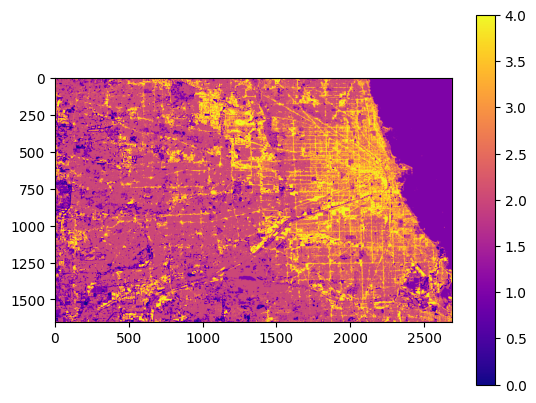

In [ ]:
# !pip install rasterio
# attempt to incorporate pandas into the code
import rasterio
import numpy as np

# Load the Landsat image
with rasterio.open('/content/drive/MyDrive/ELM/chicago.tif') as src:
    image = src.read()
    meta = src.meta

# Reshape the image to 2D array using pandas
print('Image shape before reshaping', image.shape)

# Reshape to 2D array
n_samples = image.shape[1] * image.shape[2]
n_features = image.shape[0]
image_2d = image.reshape(n_features,n_samples ).T

print('image shape after reshaping',image_2d.shape)

# Convert to DataFrame
import pandas as pd
df = pd.DataFrame(image_2d)
print('shape of df', df.shape)

# Renaming the columns
df.columns = X.columns.tolist()   # fully functional with hard coding the band names as a list

# Replacing all the NaN value to zero
df = df.replace(np.nan, 0)


model = ensemble # Used model

# Predict the classes of the Landsat image
prediction = ensemble.predict(df)
print('length of prediction', len(prediction))

# Reshape the prediction back to 2D
prediction_2d = prediction.reshape(image.shape[1], image.shape[2])

import matplotlib.pyplot as plt

# Plot the predicted classes
plt.imshow(prediction_2d, cmap='plasma')
plt.colorbar()
plt.show()

# Update the metadata to reflect the single band of the predicted classes
meta.update(count=1, dtype=rasterio.uint8)

# # Write the predicted classes to a new raster file
# with rasterio.open('karachi_classified.tif', 'w', **meta) as dst:
#     dst.write(prediction_2d.astype(rasterio.uint8), 1)

# import rasterio

# # Read the input raster file
# src = rasterio.open('/content/drive/MyDrive/ELM/dhaka.tif')

# # Get the metadata from the input raster file
# meta = src.meta

# Create a new raster file with the same metadata
dst = rasterio.open('/content/drive/MyDrive/ELM/chicago_classified.tif', 'w', **meta)

# Write the predicted classes to the new raster file
dst.write(prediction_2d.astype(rasterio.uint8), 1)

# Close the input and output raster files
src.close()
dst.close()

NameError: ignored

In [ ]:
# # This code block ensure that the output image has same georeference as the input image

# # Load the original Landsat image
# with rasterio.open('input_image.tif') as src:
#     # Get the metadata of the original image
#     meta = src.meta

# Update the metadata to reflect the single band of the predicted classes
meta.update(count=1, dtype=rasterio.uint8)

# # Write the predicted classes to a new raster file
# with rasterio.open('karachi_classified.tif', 'w', **meta) as dst:
#     dst.write(prediction_2d.astype(rasterio.uint8), 1)

# import rasterio

# # Read the input raster file
# src = rasterio.open('/content/drive/MyDrive/ELM/dhaka.tif')

# # Get the metadata from the input raster file
# meta = src.meta

# Create a new raster file with the same metadata
dst = rasterio.open('/content/drive/MyDrive/ELM/chicago_classified.tif', 'w', **meta)

# Write the predicted classes to the new raster file
dst.write(prediction_2d.astype(rasterio.uint8), 1)

# Close the input and output raster files
src.close()
dst.close()

Image shape before reshaping: (19, 1654, 2656)
Image shape after reshaping: (4393024, 19)
Shape of df: (4393024, 19)
Length of prediction: 4393024


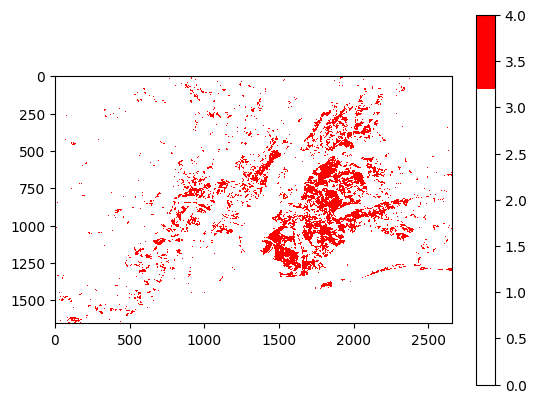

In [ ]:
# Selecting manual color palette
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the Landsat image
with rasterio.open('/content/drive/MyDrive/ELM/newyork.tif') as src:
    image = src.read()
    meta = src.meta

# Reshape the image to 2D array using pandas
print('Image shape before reshaping:', image.shape)

# Reshape to 2D array
n_samples = image.shape[1] * image.shape[2]
n_features = image.shape[0]
image_2d = image.reshape(n_features, n_samples).T

print('Image shape after reshaping:', image_2d.shape)

# Convert to DataFrame
df = pd.DataFrame(image_2d)
print('Shape of df:', df.shape)

# Replacing all the NaN value to zero
df = df.replace(np.nan, 0)

# Renaming the columns
df.columns = X.columns.tolist()   # fully functional with hard coding the band names as a list

# Define the custom colors for each value
color_map = {0: 'white', 1: 'white', 2: 'white', 3: 'white', 4: 'red'}

# Predict the classes of the Landsat image
prediction = model.predict(df)
print('Length of prediction:', len(prediction))

# Reshape the prediction back to 2D
prediction_2d = prediction.reshape(image.shape[1], image.shape[2])

# Create a custom colormap based on the color map dictionary
cmap = mcolors.ListedColormap([color_map[value] for value in sorted(color_map.keys())])

# Plot the predicted classes
plt.imshow(prediction_2d, cmap=cmap)
plt.colorbar()
plt.show()

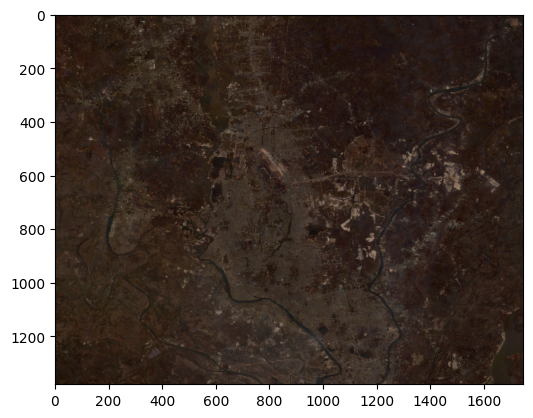

AttributeError: ignored

testing dataset shape (1379, 1747, 3)


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the image using rasterio
with rasterio.open('/content/drive/MyDrive/ELM/dhaka.tif') as src:
    # Extract the red, green, and blue bands
    red = src.read(17)
    green = src.read(16)
    blue = src.read(15)

# Stack the bands along the third dimension to create an RGB image
rgb_image = np.dstack((red, green, blue))

# Normalize the pixel values to the range [0, 1]
rgb_image_n = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

# Visualize the RGB image using matplotlib
plt.imshow(rgb_image_n)
plt.show()

print('testing dataset shape', rgb_image.shape)
print('df.columns.tolist()',rgb_image.columns.tolist())


In [ ]:
import numpy as np
np.isnan(image_2d)

# Identify rows with missing values
missing_rows = np.isnan(image_2d).any(axis=1)
print(missing_rows)

# Drop the missing rows
image_2d = image_2d[~missing_rows]

[False False False ... False False False]


In [ ]:
# print(df[0])
X.columns.tolist()

In [ ]:
from osgeo import gdal

dataset = gdal.Open('/content/test_42Bands.tif')

# Create an empty list to store the band names
band_names = []

# Loop through each band in the dataset
for i in range(dataset.RasterCount):
    # Get the name of the current band and append it to the list
    band_name = dataset.GetRasterBand(i+1).GetDescription()
    band_names.append(band_name)

# Print the list of band names
print(band_names)
# naming order seems wrong

In [ ]:
# # Load the original Landsat image
# with rasterio.open('shanghai_26Bands_small.tif') as src:
#     # Get the metadata of the original image
      # meta = src.meta

# Update the metadata to reflect the single band of the predicted classes
meta.update(count=1, dtype=rasterio.uint8)

# Write the predicted classes to a new raster file
with rasterio.open('predicted_classes3.tif', 'w', **meta) as dst:
    dst.write(prediction_2d.astype(rasterio.uint8), 1)

In [ ]:
%who


AdaBoostClassifier	 GradientBoostingClassifier	 RandomForestClassifier	 VotingClassifier	 X	 XGBClassifier	 X_for_plot	 X_test	 X_train	 
ab_model	 accuracy_ab	 accuracy_gb	 accuracy_rf	 accuracy_score	 accuracy_xgb	 ada	 ada_accuracy	 ada_pred	 
all_files	 best_n_estimators_ab	 best_n_estimators_gb	 best_n_estimators_rf	 best_n_estimators_xgb	 city_list	 class_total	 cmap	 color_map	 
column	 corr_matrix	 count_info	 csv_files	 data	 df	 df_list	 dst	 ensemble	 
ensemble_accuracy	 feature_name	 feature_names	 file	 gb	 gb_accuracy	 gb_model	 gb_pred	 image	 
image_2d	 importance	 importances	 joblib	 max_accuracy	 mcolors	 merged_df	 meta	 model	 
n_estimators	 n_estimators_list	 n_features	 n_samples	 np	 os	 path	 pd	 pivot_table	 
pivot_table1	 plt	 prediction	 prediction_2d	 rasterio	 rf	 rf_accuracy	 rf_model	 rf_pred	 
sn	 sns	 src	 train_test_split	 xgb	 xgb_accuracy	 xgb_model	 xgb_pred	 y	 
y_pred	 y_pred_ab	 y_pred_gb	 y_pred_rf	 y_pred_xgb	 y_test	 y_train	 


In [ ]:
df.columns

Index(['HH', 'HV', 'L9_aerosols', 'L9_blue', 'L9_green', 'L9_nir', 'L9_red',
       'L9_swir1', 'L9_swir2', 'VH', 'VV', 'indbiMax', 'indbiMedian',
       'mndwiMax', 'mndwiMedian', 'mndwiSD', 'ndbiMedian', 'ndbiMin', 'ndbiSD',
       'nduiMedian', 'nduiMin', 'nduiSD', 'ndviMax', 'ndviMedian', 'ndviSD',
       's2_aerosols', 's2_blue', 's2_green', 's2_nir', 's2_red', 's2_redEdge1',
       's2_redEdge2', 's2_redEdge3', 's2_redEdge4', 's2_swir1', 's2_swir2',
       's2_waterVapor', 'swiRedMedian', 'viirs'],
      dtype='object')

In [ ]:
import pandas as pd
import os

csv_files = os.listdir('/content/drive/MyDrive/ELM')

# Filter the list to only include files with the '.csv' extension
city_list = [file for file in csv_files if file.endswith('.csv')]

print(city_list)

# Create empty list to store DataFrames
df_list = []

for file in city_list:
    # Construct full path
    path = '/content/drive/MyDrive/ELM/' + file

    # Read CSV
    df = pd.read_csv(path)

    # Append to DataFrame list
    df_list.append(df)

# Merge all DataFrames into a single DataFrame
df = pd.concat(df_list)

# select city and class columns
df = df[['City', 'Class']]

# Count the number of occurrences of each class in each city
count_info = df.groupby(['City', 'Class']).size().reset_index(name='Count')

# Pivot the table so that the Classes are columns
pivot_table = count_info.pivot(index='City', columns='Class', values='Count')
class_total = count_info.pivot(index='Class', columns='City', values='Count')

# Add a new column to the table that sums the counts for each city
# pivot_table['Total'] = pivot_table.sum(axis=1)
class_total['Total'] = class_total.sum(axis=1)

print(pivot_table)
print(class_total['Total'])

['newyork.csv', 'tokyo.csv', 'shanghai.csv', 'beijing.csv', 'jakarta.csv', 'delhi.csv', 'moscow.csv', 'london.csv', 'paris.csv', 'karachi.csv', 'djibouti.csv', 'khartoum.csv', 'tehran.csv', 'karachi2.csv', 'kabul.csv', 'fagurholsmyri.csv', 'ushuaia.csv', 'tabuk.csv', 'harbin.csv', 'melbourne.csv', 'murmansk.csv', 'rabat.csv', 'chicago.csv', 'toronto.csv', 'lagos.csv', 'dhaka.csv', 'mexicocity.csv', 'saopaulo.csv', 'istanbul.csv', 'cairo.csv', 'johannesburg.csv', 'ndjamena.csv', 'dakar.csv', 'sauda.csv', 'moab.csv', 'lasVegas.csv', 'riverBangladesh.csv', 'easternAfrica.csv', 'westernSahara.csv', 'northernAfrica.csv', 'briksdalsbre.csv']
Class                 0       1       2       3       4
City                                                   
beijing             NaN    49.0   129.0    20.0  2032.0
briksdalsbre     1661.0   167.0   272.0    26.0     3.0
cairo               NaN     NaN   154.0  3383.0   130.0
chicago             NaN   338.0   309.0     5.0  2811.0
dakar               

In [ ]:
# city_list = os.listdir('/content/drive/MyDrive/ELM')
# print(city_list)

# Filter the list to only include files with the '.csv' extension
all_files = os.listdir('/content/drive/MyDrive/ELM')
city_list = [file for file in all_files if file.endswith('.csv')]

print(city_list)

['dhaka.csv', 'newyork.csv', 'tokyo.csv', 'shanghai.csv', 'beijing.csv', 'jakarta.csv', 'delhi.csv', 'paris.csv', 'london.csv', 'moscow.csv', 'karachi.csv']
